<a href="https://colab.research.google.com/github/lourencocavalcante/my-studies/blob/main/AT08_CNN_Segmenta%C3%A7%C3%A3o_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# CAP-421-3: Aprendizado Profundo
## Atividade 8 : 
## **Uso de Rede Convolucional na sementação de imagens no problema de extração de árvores na Floresta Amazônica.**

* Luan Orion Baraúna 

* Vinicius Monego


A segmentação de imagem é uma técnica utilizada na visão computacional que divide a imagem em diferentes componentes. Essa divisão normalmente é realizada a partir de contorno, diferenças de cores e contrastes entre as diversas regiões da imagem assim como ilustra o exemplo abaixo.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/77/Method_of_Statistical_Region_Merging_%28SRM%29.png" width = 300> 

A partir da segmentação, conseguimos aplicar as técninas de aprendizado profundo para realizarmos a **classificação**, onde o algoritmo reconhece padrões de determinado tipo da imagem e assim torna-se capaz de detectar futuras imagens.

Neste trabalho iremos utilizar duas imagens de uma mesma região da floresta de instantes de tempo difentes. As imagens estão em escalas de cinza que possuem informações acerca da extração de árvores na Floresta Amazônica. A subtração dessas duas imagens nos fornecerá as regiões que sofreram algum tipo de alteração.


### Estratégias 

Este relatório foi desenvolvido no [Google Colab](https://colab.research.google.com/) seu o código fonte pode ser encontrado no [GitHub](https://github.com/barauna-lo/CAP4213-Deep-Learning/blob/main/AT8_CNN_Segmenta%C3%A7%C3%A3o_de_Imagens.ipynb) e o mesmo está dividido em duas seções. Para solucionarmos o problema de segmentação de classificação de imagens dividimos este trabalho em duas partes. Na primeira realizaremos o **Tratamento da Imagem** da qual iremos realizar a:

1. Leitura, visualização e subtração dos arquivos. 
2. Conversão de escala de cinza para RGB.
3. Extração de _patches_ de tamanho 64x64 pixeis.
4. Visualização dos _patches_.
5. Conversão dos _patches_ em tensores.

Em seguida iremos utilizar a rede neuraul [U-Net](https://keras.io/examples/vision/oxford_pets_image_segmentation/) da biblioteca ```Keras``` para realizarmos o a **Modelo de Rede Neural**. 

## **Tratamento da Imagem**

Para iniciarmos a nossa análise iremos fazer o donwload das 
imagens que serão segmentadas 

In [ ]:
#Extracting all the foldes from the original dropbox site
!gdown --id 1wmo1MBTVkFoRbrPOaL4k0XdyrTjQb-IR
!unzip "Classificacao.zip"


#### 1. Leitura, visualização e subtração dos arquivos. 

Agora, iremos visualizar as imagens as quais iremos fazer a subração e posteriormente a segmentação.

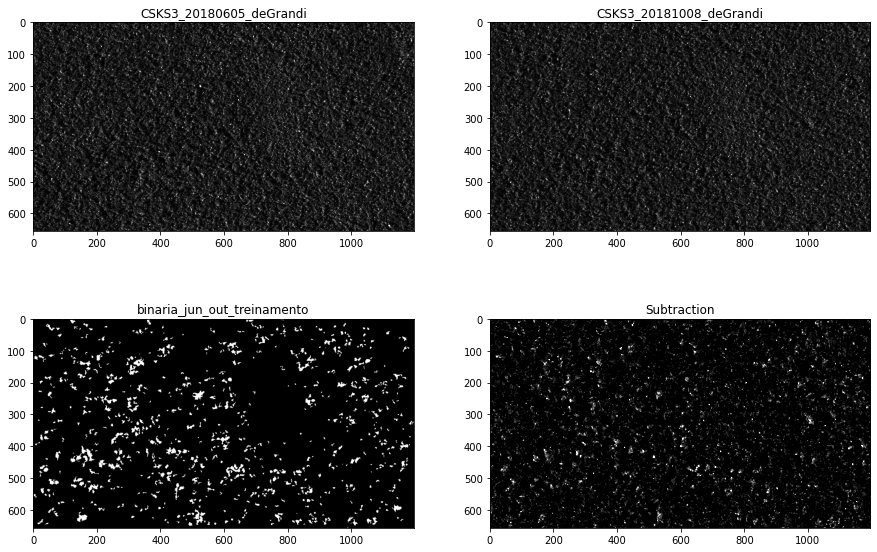

In [ ]:
import matplotlib.pyplot as plt 
import skimage.io as skio

im1 = skio.imread("CSKS3_20180605_deGrandi.tif")
im2 = skio.imread("CSKS3_20181008_deGrandi.tif")
im3 = skio.imread("/content/binaria_jun_out_treinamento.tiff", )

#Creating the figure invariment
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.imshow(im1, cmap = 'gray',vmin=0, vmax=1)
plt.title("CSKS3_20180605_deGrandi")

plt.subplot(222)
plt.imshow(im2, cmap = 'gray',vmin=0, vmax=1)
plt.title("CSKS3_20181008_deGrandi")

plt.subplot(2,2,3)
plt.imshow(im3, cmap = 'gray',vmin=0, vmax=1)
plt.title(str("binaria_jun_out_treinamento"))

sub = im2-im1
plt.subplot(2,2,4)
plt.imshow(sub, cmap = 'gray',vmin=0, vmax=0.3) #SUPER SATURADA
plt.title('Subtraction')

plt.show()


#### 2. Conversão de escala de cinza para RGB.

A conversão para RGB é necessária pois o modelo U-Net é desenvolvido para este tipo de imagem.

Importaremos agora algumas bibliotecas que iremos utilizar. Entre elas o ``` tensorflow ```, ``` scikit-image ``` e ``` scikit-learn``` alem do ```os```.

<img src="https://seeklogo.com/images/T/tensorflow-logo-AE5100E55E-seeklogo.com.png" width =300>

<img src="https://www.nicolaromano.net/wp-content/uploads/2020/12/skimagelogo.png" width =300>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/240px-Scikit_learn_logo_small.svg.png" width =300>

Para a vizualização das imagens iremos utilizar a biblioteca /```mathplotlib```

<img src="https://matplotlib.org/_static/logo2_compressed.svg" width = 500> 




In [ ]:
import os
import tensorflow as tf
import skimage.io as skio
import skimage.color as skc
import skimage.transform as skt
import sklearn.feature_extraction as skfe

Após, as imagens são lidas, convertidas para RGB (para execução no modelo da rede neural), e são extraídos patches de tamanho 32x32 nas duas imagens. Essa conversão é relizada pela biblioteca ```scikit-image```.



In [ ]:
sub = skc.gray2rgb(sub) # Imagem da subtração das duas imagens
imtg = skc.gray2rgb(im3) # Imagem da segmentação binária

#### 3. Segmentação em _patches_ de tamanho 64x64 pixeis.

Na proxima célula usaremos a biblioteca ```scikit-image``` para separar a imagem subtraída em patches de tamanho 64x64. Em seguida, realizaremos a mesma divisão para a imagem já segmentada que possuímos. 

In [ ]:
X_train = skfe.image.extract_patches_2d(sub, (64, 64), max_patches=200, random_state=42)
y = skfe.image.extract_patches_2d(imtg, (64, 64), max_patches=200, random_state=42)

#### 4. Visualização dos _patches_.

Mostrando um patch e seu patch correspondente:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Target')

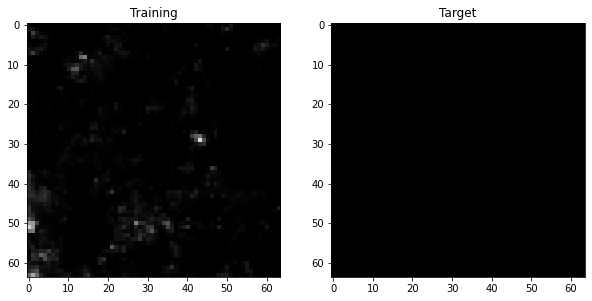

In [ ]:
#Creating the figure invariment
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(X_train[100], cmap = 'gray',vmin=0, vmax=1)
plt.title('Training')

plt.subplot(122)
plt.imshow(y[100], cmap = 'gray',vmin=0, vmax=1)
plt.title('Target')

#### 5. Conversão dos patches em tensores.

Converteremos tanto as imagens de treinamento quanto as imagens de validação em tensores para que possamos treinar o modelo de rede neural.

In [ ]:
X_train = tf.convert_to_tensor(X_train)

In [ ]:
#X_val = tf.convert_to_tensor(X_val)

In [ ]:
y = tf.convert_to_tensor(y)

## Modelo de Rede Neural

O modelo utilizado é uma U-Net pré-definida retreinada para o problema em questão importada, implementada no pacote ```keras-unet```, uma extensão da biblioteca ```keras```.


<img src= "https://keras.io/img/logo.png" width =300> 

A U-Net é uma rede de segmentação do tipo encoder-decoder, vista na figura abaixo.

![U-Net](https://www.researchgate.net/publication/332102788/figure/fig2/AS:753454205116418@1556648889776/Modified-U-net-network-structure.jpg)



In [ ]:
%pip install keras-unet

In [ ]:
from keras_unet.models import vanilla_unet

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


O modelo é iniciado tendo as entradas com o tamanho 64x64, que é o tamanho dos patches, e 16 filtros convolucionais. O número de classes é mantido em 1 para realizar a segmentação binária. Também é adicionada uma camada de dropout com taxa de 50%.

In [ ]:
from keras_unet.models import custom_unet

model = custom_unet(
    input_shape=(64, 64, 3),
    use_batch_norm=False,
    num_classes=1,
    filters=16,
    dropout=0.5,
    output_activation='sigmoid')

#Compiling the model 
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['accuracy'])

history = model.fit(X_train, y, epochs=15, validation_split=0.8)

Epoch 1/15
2/2 [==============================] - 6s 2s/step - loss: 0.2610 - accuracy: 0.1996 - val_loss: 0.2489 - val_accuracy: 0.6612
Epoch 2/15
2/2 [==============================] - 3s 2s/step - loss: 0.2474 - accuracy: 0.6329 - val_loss: 0.2403 - val_accuracy: 0.8976
Epoch 3/15
2/2 [==============================] - 3s 2s/step - loss: 0.2228 - accuracy: 0.8679 - val_loss: 0.1691 - val_accuracy: 0.9334
Epoch 4/15
2/2 [==============================] - 3s 2s/step - loss: 0.1160 - accuracy: 0.9273 - val_loss: 0.0646 - val_accuracy: 0.9357
Epoch 5/15
2/2 [==============================] - 3s 2s/step - loss: 0.0689 - accuracy: 0.9308 - val_loss: 0.0639 - val_accuracy: 0.9361
Epoch 6/15
2/2 [==============================] - 3s 2s/step - loss: 0.0688 - accuracy: 0.9312 - val_loss: 0.0639 - val_accuracy: 0.9361
Epoch 7/15
2/2 [==============================] - 3s 2s/step - loss: 0.0688 - accuracy: 0.9312 - val_loss: 0.0639 - val_accuracy: 0.9361
Epoch 8/15
2/2 [=========================

Plotando alguns gráficos


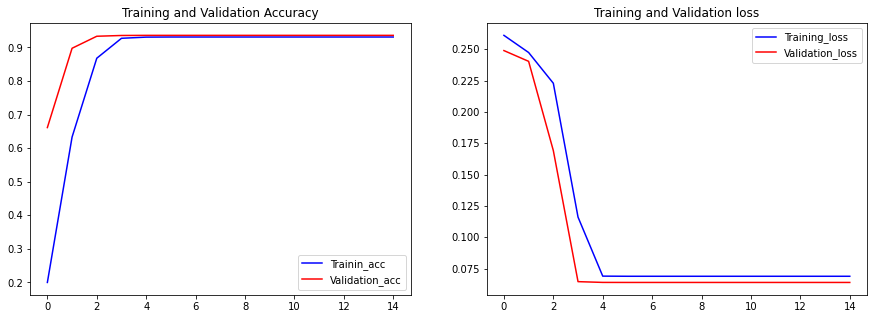

In [ ]:
acc =      history.history['accuracy']
val_acc =  history.history['val_accuracy']
loss =     history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(epochs,acc,    label='Trainin_acc',   color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(122)
plt.plot(epochs,loss,    label='Training_loss',  color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

plt.show()

In [ ]:
#model.summary()

## Resultados

A arquitetura utilizada foi desenhada para tratar problemas de segmentação e classificação de imagens. Dessa forma, assimo como pode ser observado nos gráficos acima, o modelo aprendeu de forma rápida e em poucas épocas alcançou o padrão esperado. 